In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
import time
from scipy.spatial import distance
from skimage.metrics import structural_similarity as ssim
from tqdm import tqdm

In [2]:
pathToData = '..\\06_MNIST\\emnist\\'
img_rows = img_cols = 28

def loadBinData(pathToData, img_rows, img_cols): 
    print('Загрузка данных из двоичных файлов...') 
    with open(pathToData + 'imagesTrain.bin', 'rb') as read_binary: 
        x_train = np.fromfile(read_binary, dtype = np.uint8) 
    with open(pathToData + 'labelsTrain.bin', 'rb') as read_binary: 
        y_train = np.fromfile(read_binary, dtype = np.uint8) 
    with open(pathToData + 'imagesTest.bin', 'rb') as read_binary: 
        x_test = np.fromfile(read_binary, dtype = np.uint8) 
    with open(pathToData + 'labelsTest.bin', 'rb') as read_binary: 
        y_test = np.fromfile(read_binary, dtype = np.uint8) 

    x_train = np.array(x_train[16:], dtype = 'float32') / 255 
    x_test = np.array(x_test[16:], dtype = 'float32') / 255

    x_train = x_train.reshape(-1, img_rows, img_cols).transpose(0,2,1)
    x_test = x_test.reshape(-1, img_rows, img_cols).transpose(0,2,1)

    x = np.concatenate([x_train, x_test]) 

    y_train = y_train[8:]
    y_test = y_test[8:] 

    y = np.concatenate([y_train, y_test])
    y -= 1
    return x, y

def get_min(x, y, cls_numb, n_tst, N):
    x_cls = np.array([img for img, lbl in zip(x, y) if lbl == cls_numb])
    in_cls = len(x_cls)
    min_pix = 255
    for it in range(n_tst):
        print('Попытка:', it)
        arr_idx = np.random.randint(0, len(x_cls), N)
        arr_idx = set(arr_idx)
        x_tst = x_cls[list(arr_idx)]
        for img in x_tst:
            img = img.flatten()
            img = img[[pix > 0 for pix in img]]
            pix = np.min(img)
            min_pix = min(min_pix, pix)
    return min_pix

# MNIST

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

print(x.shape)
print(y.shape)
print(np.min(x))
print(np.max(x))

(70000, 28, 28)
(70000,)
0.0
1.0


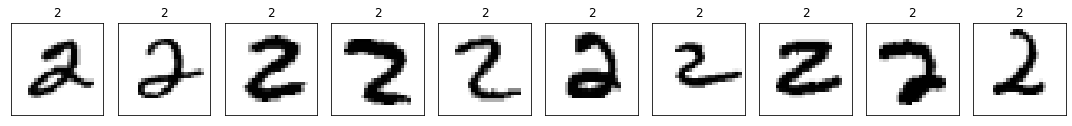

In [4]:
label_number = 2
x_number = x[y == label_number]

fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axs.flat):
	ax.imshow(x_number[i], cmap=plt.cm.binary)
	ax.set_title(str(label_number))
plt.tight_layout()
plt.show()

(28, 28)


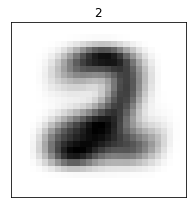

In [5]:
x_number_mean = np.mean(x_number, axis=0)

print(x_number_mean.shape)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(3, 3),
                        subplot_kw={'xticks': [], 'yticks': []})


axs.imshow(x_number_mean, cmap=plt.cm.binary)
axs.set_title(str(label_number))

plt.tight_layout()
plt.show()

# EMNIST

In [6]:
x, y = loadBinData(pathToData, img_rows, img_cols)

print(x.shape)
print(y.shape)

Загрузка данных из двоичных файлов...
(145600, 28, 28)
(145600,)


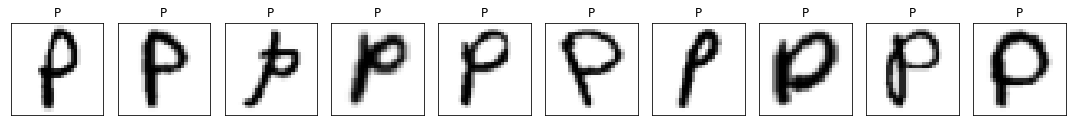

In [7]:
label_letter = 'P'
label_repr = ord(label_letter) - 65
x_letter = x[y == label_repr]

fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axs.flat):
	ax.imshow(x_letter[i], cmap=plt.cm.binary)
	ax.set_title(label_letter)
plt.tight_layout()
plt.show()

(28, 28)


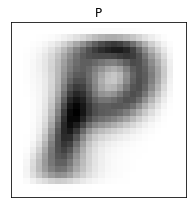

In [8]:
x_letter_mean = np.mean(x_letter, axis=0)

print(x_letter_mean.shape)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(3, 3),
                        subplot_kw={'xticks': [], 'yticks': []})

axs.imshow(x_letter_mean, cmap=plt.cm.binary)
axs.set_title(label_letter)

plt.tight_layout()
plt.show()

In [9]:
threshold = 0.95

letter1 = 'I'
letter1_repr = ord(letter1) - 65
x_letter1 = x[y == letter1_repr]

letter2 = 'L'
letter1_repr = ord(letter2) - 65
x_letter2 = x[y == letter1_repr]

print(x_letter1.shape, '\t', x_letter2.shape)

ssim_list = []
max_len = 10
for i in range(x_letter1.shape[0]):
	for j in range(i, x_letter2.shape[0]):
		current_ssim = ssim(x_letter1[i], x_letter2[j])
		if current_ssim > threshold and len(ssim_list) < max_len:
			ssim_list.append((i, j, current_ssim))
		elif len(ssim_list) >= max_len:
			break
	if len(ssim_list) >= max_len: break


(5600, 28, 28) 	 (5600, 28, 28)


(1, 2607, 0.9743490784215565)


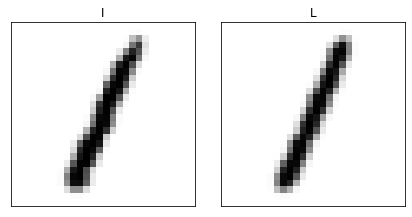

In [10]:

ssim_list.sort(key = lambda r:(r[2]))
nearest = ssim_list[-1]
print(nearest)


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3),
                        subplot_kw={'xticks': [], 'yticks': []})

axs[0].imshow(x_letter1[nearest[0]], cmap=plt.cm.binary)
axs[0].set_title(letter1)
axs[1].imshow(x_letter2[nearest[1]], cmap=plt.cm.binary)
axs[1].set_title(letter2)
plt.tight_layout()
plt.show()

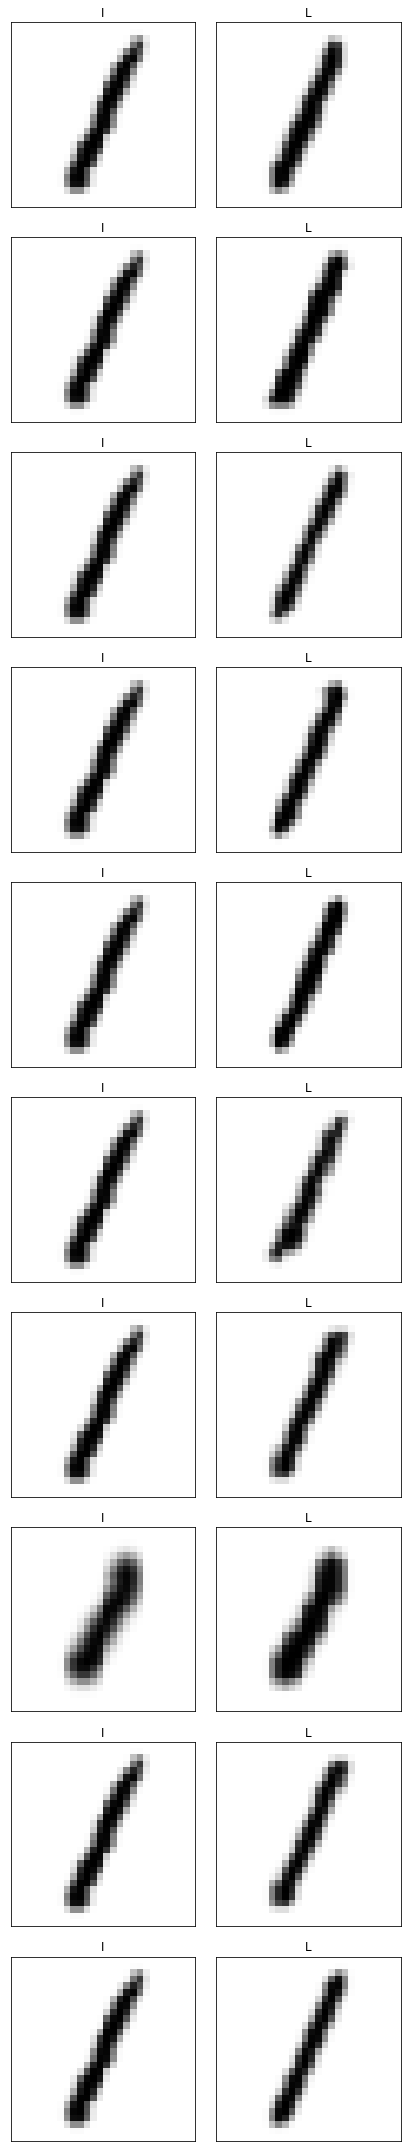

In [11]:
fig, axs = plt.subplots(nrows=len(ssim_list), ncols=2, figsize=(6, 3*len(ssim_list)),
                        subplot_kw={'xticks': [], 'yticks': []})

for i in range(len(ssim_list)):
    axs[i, 0].imshow(x_letter1[ssim_list[i][0]], cmap=plt.cm.binary)
    axs[i, 0].set_title(letter1)
    axs[i, 1].imshow(x_letter2[ssim_list[i][1]], cmap=plt.cm.binary)
    axs[i, 1].set_title(letter2)
plt.tight_layout()
plt.show()

In [12]:
min_pix = get_min(x, y, 5, 10, 500)
print('min_pix =', min_pix)

Попытка: 0
Попытка: 1
Попытка: 2
Попытка: 3
Попытка: 4
Попытка: 5
Попытка: 6
Попытка: 7
Попытка: 8
Попытка: 9
min_pix = 0.003921569


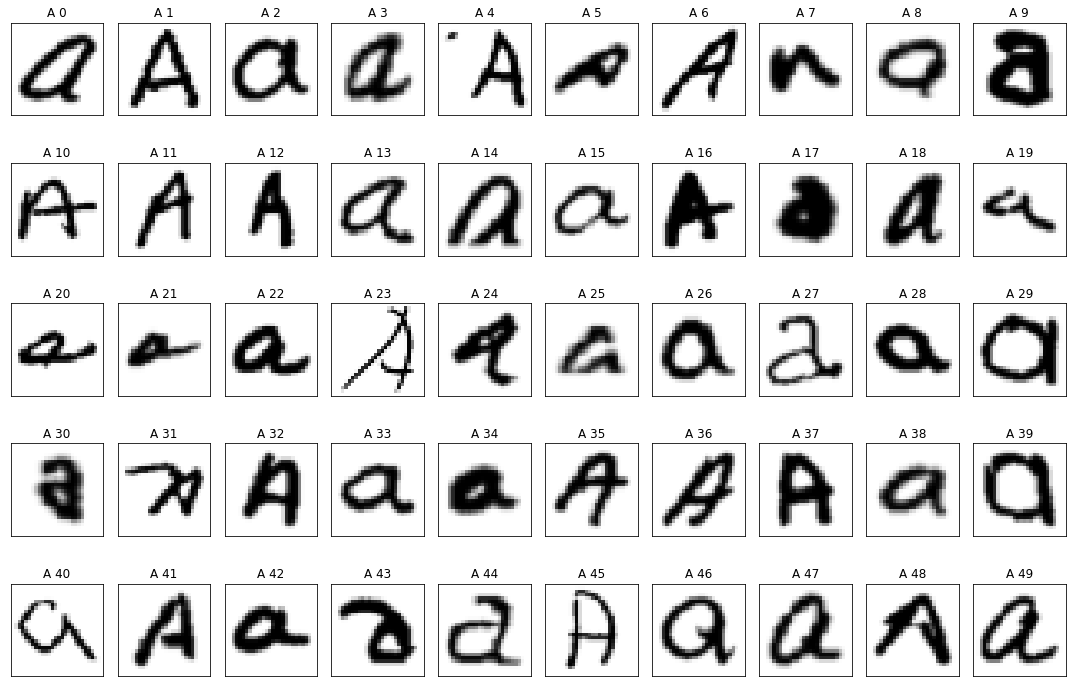

In [13]:
label_letter = 'A'
label_repr = ord(label_letter) - 65
x_letter = x[y == label_repr]

fig, axs = plt.subplots(nrows=5, ncols=10, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axs.flat):
	ax.imshow(x_letter[i], cmap=plt.cm.binary)
	ax.set_title(label_letter + ' ' + str(i))
plt.tight_layout()
plt.show()

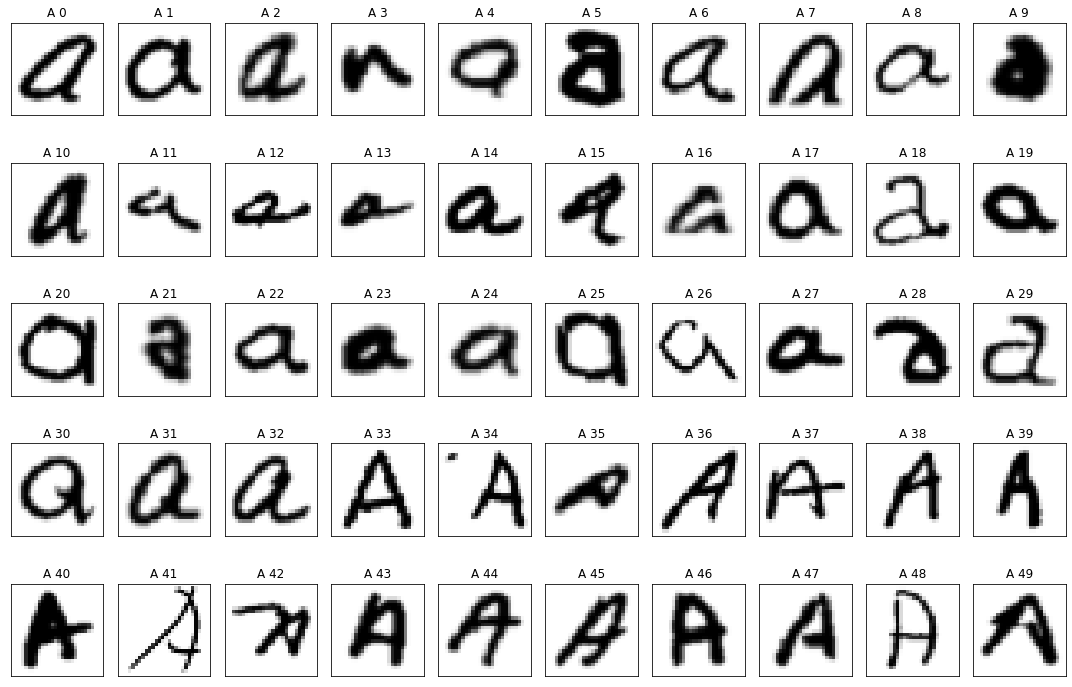

In [14]:
LC_idxs = [0, 2, 3, 7, 8, 9, 13, 14, 15, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 33, 34, 38, 39, 40, 42, 43, 44, 46, 47, 49]
UC_idxs = [1, 4, 5, 6, 10, 11, 12, 16, 23, 31, 32, 35, 36, 37, 41, 45, 48]
x_let_LC = x_letter[LC_idxs]
x_let_UC = x_letter[UC_idxs]

fig, axs = plt.subplots(nrows=5, ncols=10, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axs.flat):
	if i < len(x_let_LC):
		ax.imshow(x_let_LC[i], cmap=plt.cm.binary)
		ax.set_title(label_letter + ' ' + str(i))
	else:
		ax.imshow(x_let_UC[i-len(x_let_LC)], cmap=plt.cm.binary)
		ax.set_title(label_letter + ' ' + str(i))
plt.tight_layout()
plt.show()

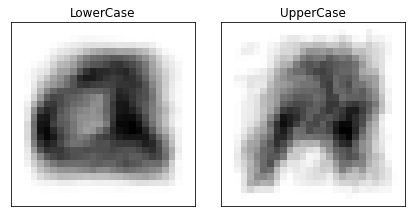

In [15]:
LC_mean = np.mean(x_let_LC, axis=0)
UC_mean = np.mean(x_let_UC, axis=0)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3),
                        subplot_kw={'xticks': [], 'yticks': []})

axs[0].imshow(LC_mean, cmap=plt.cm.binary)
axs[0].set_title('LowerCase')
axs[1].imshow(UC_mean, cmap=plt.cm.binary)
axs[1].set_title('UpperCase')
plt.tight_layout()
plt.show()

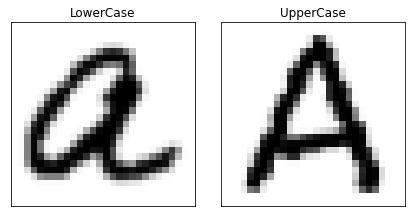

In [16]:
LC_sample = x_letter[49]
UC_sample = x_letter[1]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3),
                        subplot_kw={'xticks': [], 'yticks': []})

axs[0].imshow(LC_sample, cmap=plt.cm.binary)
axs[0].set_title('LowerCase')
axs[1].imshow(UC_sample, cmap=plt.cm.binary)
axs[1].set_title('UpperCase')
plt.tight_layout()
plt.show()

In [17]:
LC_list = []
UC_list = []
dist_list = []

for i in range(len(x_letter)):
	img = x_letter[i]
	dist_LC = distance.cosine(img.flatten(), LC_sample.flatten())
	dist_UC = distance.cosine(img.flatten(), UC_sample.flatten())
	if dist_LC > dist_UC:
		UC_list.append(img)
	elif dist_LC < dist_UC:
		LC_list.append(img)
	dist_list.append((dist_LC, dist_UC))
	
print(len(LC_list))
print(len(UC_list))

2320
3280


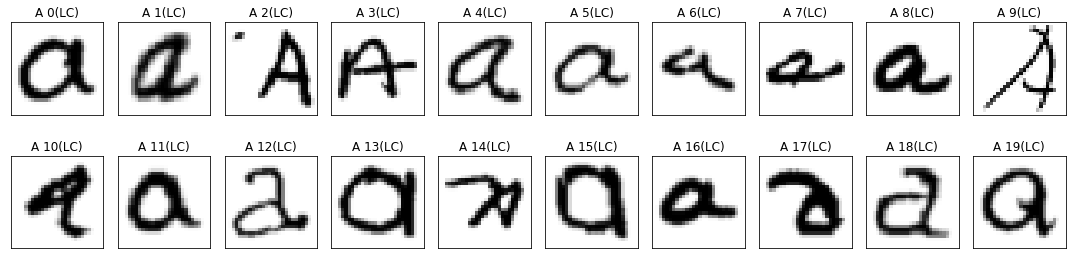

In [18]:
fig, axs = plt.subplots(nrows=2, ncols=10, figsize=(15, 4),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axs.flat):
	ax.imshow(LC_list[i], cmap=plt.cm.binary)
	ax.set_title(label_letter + ' ' + str(i) + '(LC)')
plt.tight_layout()
plt.show()

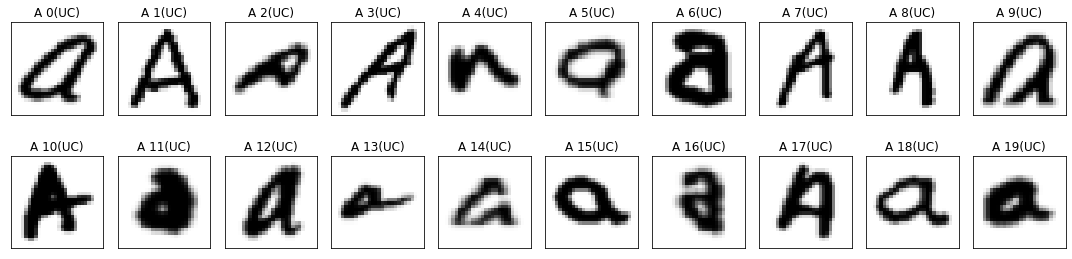

In [19]:
fig, axs = plt.subplots(nrows=2, ncols=10, figsize=(15, 4),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axs.flat):
	ax.imshow(UC_list[i], cmap=plt.cm.binary)
	ax.set_title(label_letter + ' ' + str(i) + '(UC)')
plt.tight_layout()
plt.show()

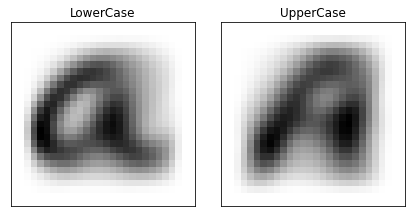

In [20]:
LC_mean_1 = np.mean(np.array(LC_list), axis=0)
UC_mean_1 = np.mean(np.array(UC_list), axis=0)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3),
                        subplot_kw={'xticks': [], 'yticks': []})

axs[0].imshow(LC_mean_1, cmap=plt.cm.binary)
axs[0].set_title('LowerCase')
axs[1].imshow(UC_mean_1, cmap=plt.cm.binary)
axs[1].set_title('UpperCase')
plt.tight_layout()
plt.show()

LC nearest:  (30, 28, 28)
UC nearest:  (13, 28, 28)


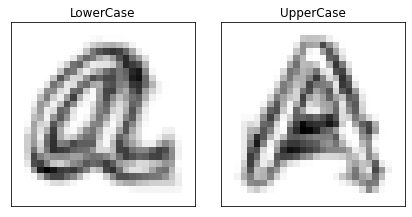

In [23]:
dist_arr = np.array(dist_list)
LC_near = np.array([img for i, img in enumerate(x_letter) if dist_arr[i][0]<0.2])
UC_near = np.array([img for i, img in enumerate(x_letter) if dist_arr[i][1]<0.2])
print('LC nearest: ', LC_near.shape)
print('UC nearest: ', UC_near.shape)


LC_mean_2 = np.var(LC_near, axis=0)
UC_mean_2 = np.var(UC_near, axis=0)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3),
                        subplot_kw={'xticks': [], 'yticks': []})

axs[0].imshow(LC_mean_2, cmap=plt.cm.binary)
axs[0].set_title('LowerCase')
axs[1].imshow(UC_mean_2, cmap=plt.cm.binary)
axs[1].set_title('UpperCase')
plt.tight_layout()
plt.show()